<a href="https://colab.research.google.com/github/bingsen-wang/PowerElectronics/blob/main/SpaceVector_ThreePhasePostiveSequence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Space Vector of Three-Phase Variables: Positive Sequence</h1></b>

Dr. Bingsen Wang

7/4/2024
</center>

#Space Vector

The space vector is complex variable defined as
$$\underline f = {2\over3}\left(f_a + f_be^{j\frac{2\pi}{3}} + f_ce^{j\frac{4\pi}{3}}\right)\tag{1}$$
where $f_a,f_b,f_c$ are the three-phase variables. In electrical systems, the variable $f$ can be voltage $v$, current $i$, or flux linkage $\lambda$. In power electronics systems, the variable $f$ can be the modulation function or switching function.

#Positive Sequence of Three-Phase Variables

In three-phase power systems, the voltages are typically sinusoidal. The three phase voltages $v_a,v_b,v_c$ form a postive sequence if they have the same amplitude and frequency and different phase angles with $v_a$ leading $v_b$ by 120 degrees and $v_b$ leading $v_c$ by 120 degrees.
$$\begin{align}
v_a &= V\cos\left(\omega t+\theta \right)\\
v_b &= V\cos\left(\omega t+\theta - \frac{2\pi}{3} \right)\\
v_c &= V\cos\left(\omega t+\theta + \frac{2\pi}{3} \right)
\end{align}\tag{2}$$

#Space Vector of Positive-Sequence Variables

With reference to (1) and (2), the voltage space vector is
$$\begin{align}
\underline v &= {2\over3}\left(v_a + v_be^{j\frac{2\pi}{3}} + v_ce^{j\frac{4\pi}{3}}\right)\\
&= {2V\over3}\left[\cos\left(\omega t+\theta\right) + \cos\left(\omega t+\theta - \frac{2\pi}{3} \right)e^{j\frac{2\pi}{3}} + \cos\left(\omega t+\theta + \frac{2\pi}{3} \right)e^{j\frac{4\pi}{3}}\right]
\end{align}\tag{3}$$

Based on Euler's identity $e^{jx}=\cos x + j\sin x$, the cosine function can be written in terms exponential functions.
$$\cos x = \frac{e^{jx} + e^{-jx}}{2}\tag{4}$$

Hence, (3) can be rewritten as
$$\begin{align}\underline v &= {2V\over3\times2}\begin{bmatrix}
e^{j\left(\omega t+\theta\right)} + e^{j\left(\omega t+\theta-\frac{2\pi}{3}\right)}e^{j\frac{2\pi}{3}} + e^{j\left(\omega t+\theta+\frac{2\pi}{3}\right)}e^{j\frac{4\pi}{3}}+\\
e^{-j\left(\omega t+\theta\right)} + e^{-j\left(\omega t+\theta-\frac{2\pi}{3}\right)}e^{j\frac{2\pi}{3}} + e^{-j\left(\omega t+\theta+\frac{2\pi}{3}\right)}e^{j\frac{4\pi}{3}}
\end{bmatrix}\\
&= Ve^{j(\omega t+\theta)}
\end{align}\tag{5}$$

#Python Code
The Python code illustrates the space vector and its correponding three-phase balanced positive sequence.

0
0
60
120
180
240
300
360
420
480
540
0


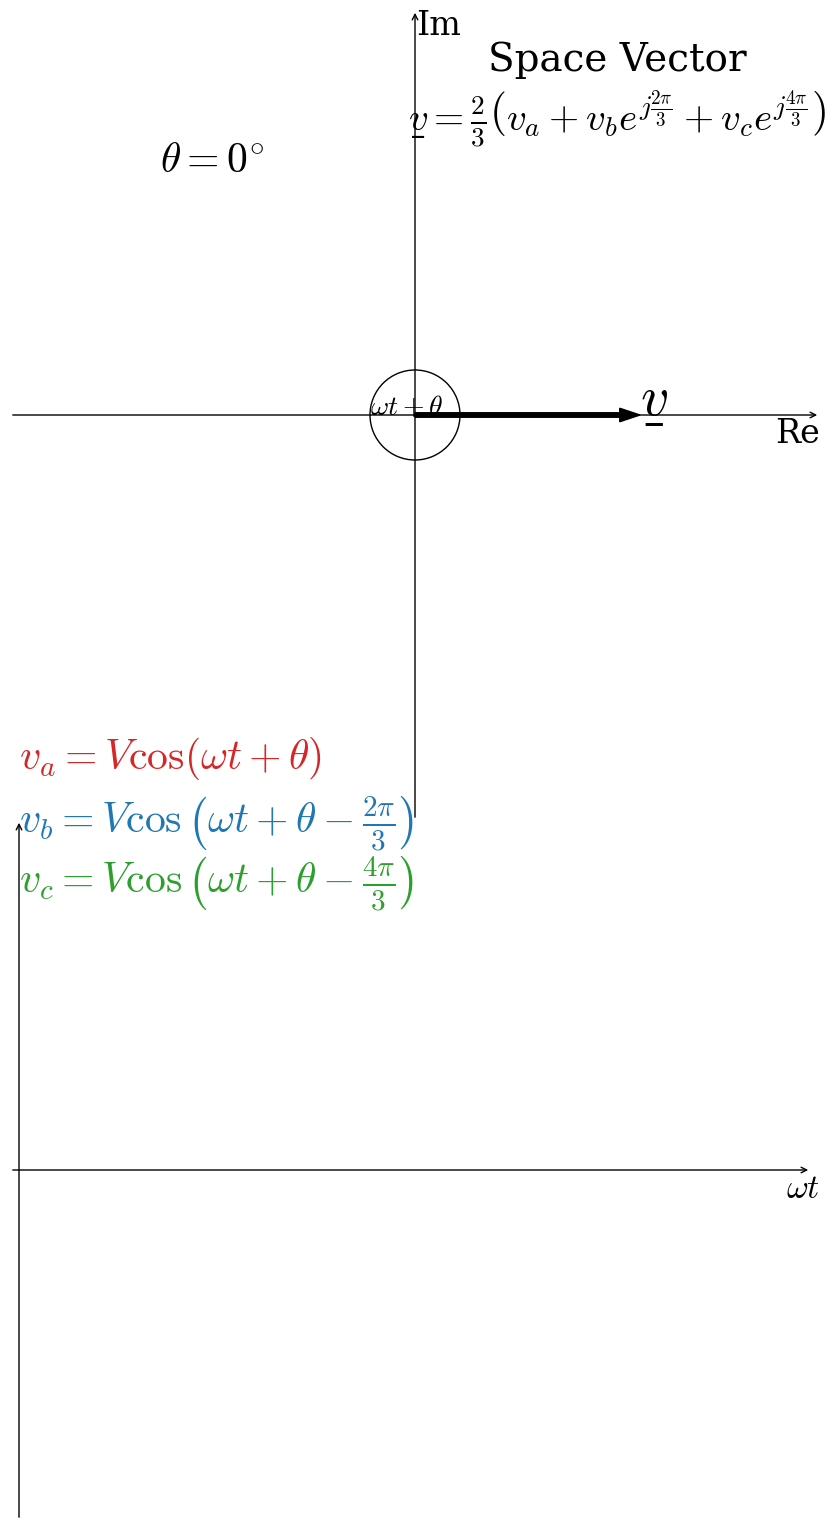

In [ ]:
import matplotlib
from os import linesep
import numpy as np
from numpy import linspace,cos,sin,pi,exp
import matplotlib.pyplot as plt
import matplotlib.patches as mp
from matplotlib import animation,rc
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "serif","mathtext.fontset" : "cm"})

#parameters
Nf = 600
f = 1 #frequency in Hz
T = 1/f #period

t=linspace(0,T,int(Nf*.5))
wt = 2*pi*f*t
V = 2.5 #voltage in V



xymax = 4.5

fig = plt.figure(figsize=(9,16))
fig.tight_layout()
ax=fig.add_axes((0.05,7/16,.9,.9*9/16),xlim=[-xymax,xymax], ylim=[-xymax,xymax],fc='none') #no fc
ax0=fig.add_axes((0.05,7/16,.9,.9*9/16),xlim=[-xymax,xymax], ylim=[-xymax,xymax],fc='none') #no fc for animated parts
ax1=fig.add_axes((0.05,0,.9,7/16),xlim=[-.1,2*xymax-.1], ylim=[-xymax*7/9,xymax*7/9],fc='none') #no fc
ax.axis('off') #turn off axis frames
ax1.axis('off') #turn off axis frames
ax.annotate("", (xymax, 0), (-xymax, 0),arrowprops={'arrowstyle':"->"}) #x-axis for space vector
ax.annotate("", (0,xymax), (0,-xymax),arrowprops={'arrowstyle':"->"}) #y-axis for space vector
ax1.annotate("", (2*xymax-.2, 0), (-.1, 0),arrowprops={'arrowstyle':"->"}) #x-axis for voltages
ax1.annotate("", (0,xymax*7/9), (0,-xymax*7/9),arrowprops={'arrowstyle':"->"}) #y-axis for voltages
ax.text(xymax,-.03,'Re',size=24,va='top',ha='right') #x-axis label
ax.text(0.01,xymax,'Im',size=24,va='top') #y label
ax.text(xymax*.5,xymax*.85,'Space Vector',size=28,ha='center')
ax.text(xymax*.5,xymax*.7,r'$v\underbar = \frac{2}{3}\left(v_a + v_b e^{j\frac{2\pi}{3}}+ v_c e^{j\frac{4\pi}{3}}\right)$',
        size=28,ha='center')
text_theta = ax.text(-xymax*.5,xymax*.6,'', size=30,color='k',ha='center')


lines = [] #array containing all the line segments
lines.append(ax.plot([], [], '-', lw=5, color='tab:orange')[0]) #v_sv trajectory
lines.append(ax1.plot([], [], '-', lw=5, color='tab:red')[0]) #v_a
lines.append(ax1.plot([], [], '-', lw=5, color='tab:blue')[0]) #v_b
lines.append(ax1.plot([], [], '-', lw=5, color='tab:green')[0]) #v_c
ax1.text(0,xymax*8.7/9,r'$v_a=V\cos(\omega t+\theta)$',size=30,va='top',color='tab:red') #va label
ax1.text(0,xymax*7.5/9,r'$v_b=V\cos\left(\omega t+\theta-\frac{2\pi}{3}\right)$',size=30,va='top',color='tab:blue') #vb label
ax1.text(0,xymax*6.3/9,r'$v_c=V\cos\left(\omega t+\theta-\frac{4\pi}{3}\right)$',size=30,va='top',color='tab:green') #vc label
ax1.text(2*xymax-.1,-.03,r'$\omega t$',size=24,va='top',ha='right') #x-axis label

def drawVectors(ax,xymax,v_sv):
  theta = np.angle(v_sv)
  if theta<0:
    theta = 2*pi+theta
  ax.clear()
  ax.set_xlim([-xymax,xymax])
  ax.set_ylim([-xymax,xymax])
  ax.axis('off')
  arr = mp.FancyArrow(0,0,v_sv.real, v_sv.imag, width=.05,length_includes_head=True,
                   color='k')
  ax.add_patch(arr)
  #arc for angle label
  arc = mp.Arc((0,0),abs(v_sv)*.4,abs(v_sv)*.4,theta1=0,theta2=theta/pi*180)
  ax.text(abs(v_sv)*.2*cos(0.5*theta),abs(v_sv)*.2*sin(.5*theta),r'$\omega t+\theta$', size = 20,color='k') #angle marking

  ax.add_patch(arc)
  if theta<pi/2 or theta>3*pi/2:
    ax.text(v_sv.real,v_sv.imag,r'$v\underbar$', size = 40,color='k',ha='left')
  else:
    ax.text(v_sv.real,v_sv.imag,r'$v\underbar$', size = 40,color='k',ha='right')
  return

# animation function. This is called sequentially
def animate(ii):
  if ii%60==0: #for monitoring the progress
    print(ii)
  # ii=500
  if int(ii/300)==0:
    theta = 0 #phase angle in radians
    text_theta.set_text(r'$\theta=0^{\circ}$')
  else:
    theta = 5*pi/6 #phase angle in radians
    text_theta.set_text(r'$\theta=150^{\circ}$')
  #three-phase variables in postive sequence
  va = V*cos(wt+theta)
  vb = V*cos(wt+theta-2*pi/3)
  vc = V*cos(wt+theta+2*pi/3)
  i=ii%300

  #space vector
  v_sv = (2/3)*(va + vb*exp(1j*2*pi/3) + vc*exp(1j*4*pi/3))
  lines[0].set_data(v_sv[:i].real,v_sv[:i].imag) #v_sv trajectory
  lines[1].set_data(t[:i]/T*xymax*1.9,va[:i]) #v_a
  lines[2].set_data(t[:i]/T*xymax*1.9,vb[:i]) #v_b
  lines[3].set_data(t[:i]/T*xymax*1.9,vc[:i]) #v_c
  drawVectors(ax0,xymax,v_sv[i])
  return
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=50)
fn = r"SpaceVector_PostiveSequence.mp4"
writervideo = animation.FFMpegWriter(fps=30)
anim.save(fn, writer=writervideo,dpi = 200)